/tmp/ipykernel_4165840/201353607.py:140: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


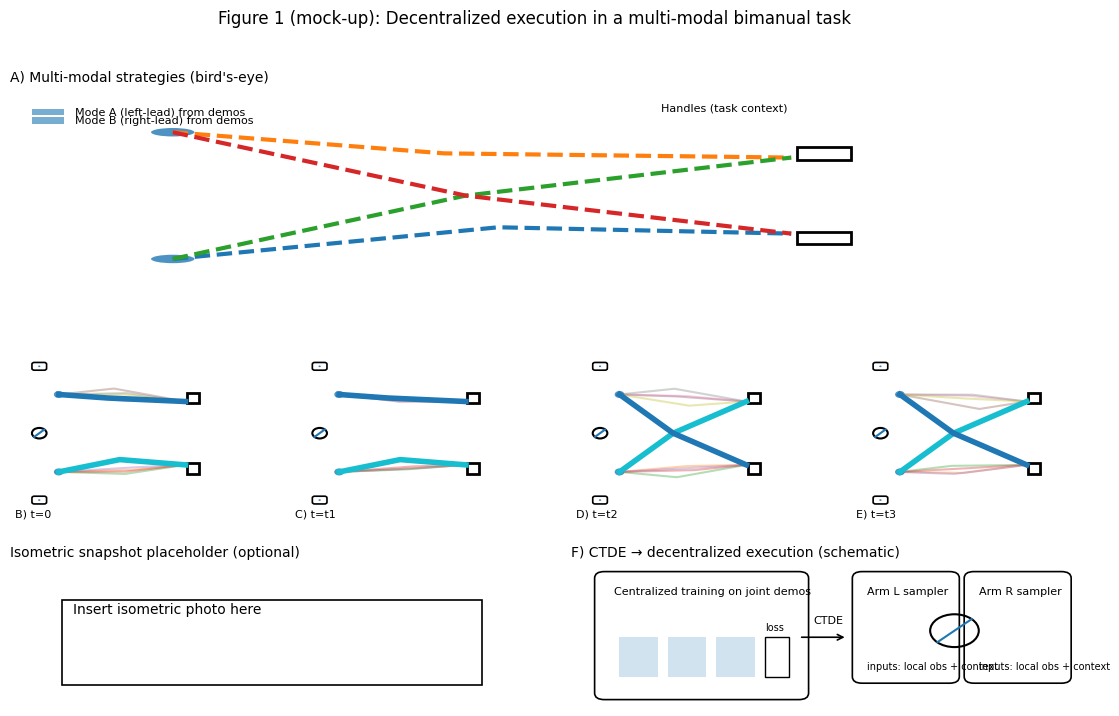

In [2]:
# Quick mock-up of a Figure 1 layout as discussed.
# This is a schematic (not real data), meant to show panel arrangement,
# overlays (multi-modal trajectories, sampled candidates), and the CTDE mini-diagram.

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch, Circle, FancyBboxPatch
import numpy as np

def draw_handles(ax, pos_top=(0.75, 0.7), pos_bottom=(0.75, 0.3), w=0.05, h=0.06):
    ax.add_patch(Rectangle((pos_top[0]-w/2, pos_top[1]-h/2), w, h, fill=False, lw=2))
    ax.add_patch(Rectangle((pos_bottom[0]-w/2, pos_bottom[1]-h/2), w, h, fill=False, lw=2))

def dashed_curve(ax, pts, lw=3, style='--', alpha=1.0):
    xs, ys = zip(*pts)
    ax.plot(xs, ys, style, lw=lw, alpha=alpha)

def solid_curve(ax, pts, lw=4, alpha=1.0):
    xs, ys = zip(*pts)
    ax.plot(xs, ys, '-', lw=lw, alpha=alpha)

def sampled_candidates(ax, start, end, n=5, jitter=0.03):
    # draw n lightly jittered splines between start and end
    for i in range(n):
        mid = ((start[0]+end[0])/2 + np.random.randn()*jitter,
               (start[1]+end[1])/2 + np.random.randn()*jitter)
        pts = [start, mid, end]
        xs, ys = zip(*pts)
        ax.plot(xs, ys, '-', lw=1.5, alpha=0.35)

def robot_icon(ax, pos, r=0.02):
    ax.add_patch(Circle(pos, r, fill=True, alpha=0.8))

def eye_icon(ax, pos, scale=0.04):
    # simple eye glyph
    x, y = pos
    w, h = scale, scale*0.6
    ax.add_patch(FancyBboxPatch((x-w/2, y-h/2), w, h, boxstyle="round,pad=0.01,rounding_size=0.01", fill=False, lw=1.2))
    ax.add_patch(Circle((x, y), h*0.2, fill=True, alpha=0.9))

def no_radio(ax, pos, size=0.06):
    # crossed circle to suggest "no comms"
    x,y=pos
    r=size/2
    ax.add_patch(Circle((x,y), r, fill=False, lw=1.5))
    ax.plot([x-r*0.7, x+r*0.7],[y-r*0.7, y+r*0.7], lw=1.5)

def hero_panel(ax):
    ax.set_title("A) Multi-modal strategies (bird's-eye)", loc='left', fontsize=10)
    ax.set_xlim(0,1); ax.set_ylim(0,1)
    ax.axis('off')
    draw_handles(ax)
    # Arm starts
        # Left-arm start
    L0=(0.15,0.2); R0=(0.15,0.8)
    robot_icon(ax, L0); robot_icon(ax, R0)
    # Mode A (left-lead) dashed
    dashed_curve(ax, [(0.15,0.2),(0.45,0.35),(0.72,0.32)])
    dashed_curve(ax, [(0.15,0.8),(0.40,0.70),(0.72,0.68)])
    # Mode B (right-lead) dashed (slightly different)
    dashed_curve(ax, [(0.15,0.2),(0.42,0.50),(0.72,0.68)])
    dashed_curve(ax, [(0.15,0.8),(0.42,0.50),(0.72,0.32)])
    # Legend blocks
    ax.add_patch(Rectangle((0.02,0.88),0.03,0.03,fill=True,alpha=0.6))
    ax.text(0.06,0.895,"Mode A (left-lead) from demos", fontsize=8, va='center')
    ax.add_patch(Rectangle((0.02,0.84),0.03,0.03,fill=True,alpha=0.6))
    ax.text(0.06,0.855,"Mode B (right-lead) from demos", fontsize=8, va='center')
    ax.text(0.60,0.90,"Handles (task context)", fontsize=8)

def timelapse_panel(ax, tlabel="t=0", select='A'):
    ax.set_xlim(0,1); ax.set_ylim(0,1); ax.axis('off')
    draw_handles(ax)
    # local sensors + no-comms
    eye_icon(ax, (0.12,0.88)); eye_icon(ax, (0.12,0.12)); no_radio(ax,(0.12,0.5))
    # current positions
    L=(0.20,0.28); R=(0.20,0.72)
    robot_icon(ax,L); robot_icon(ax,R)
    # sample candidates for both
    sampled_candidates(ax, L, (0.72,0.32), n=4)
    sampled_candidates(ax, R, (0.72,0.68), n=4)
    # chosen plan (switch which mode is chosen depending on select)
    if select=='A':
        solid_curve(ax, [L,(0.45,0.35),(0.72,0.32)])
        solid_curve(ax, [R,(0.40,0.70),(0.72,0.68)])
    else:
        solid_curve(ax, [L,(0.42,0.50),(0.72,0.68)])
        solid_curve(ax, [R,(0.42,0.50),(0.72,0.32)])
    ax.text(0.02,0.02,tlabel,fontsize=8)

def ctde_minidiagram(ax):
    ax.set_title("F) CTDE → decentralized execution (schematic)", loc='left', fontsize=10)
    ax.axis('off')
    # training box
    ax.add_patch(FancyBboxPatch((0.02,0.55),0.40,0.35,boxstyle="round,pad=0.02",lw=1.2,fill=False))
    ax.text(0.04,0.85,"Centralized training on joint demos",fontsize=8)
    ax.add_patch(Rectangle((0.05,0.60),0.08,0.12,fill=True,alpha=0.2))
    ax.add_patch(Rectangle((0.15,0.60),0.08,0.12,fill=True,alpha=0.2))
    ax.add_patch(Rectangle((0.25,0.60),0.08,0.12,fill=True,alpha=0.2))
    ax.add_patch(Rectangle((0.35,0.60),0.05,0.12,fill=False,lw=1.0))
    ax.text(0.35,0.74,"loss",fontsize=7)
    # arrow to execution
    ax.annotate("", xy=(0.52,0.72), xytext=(0.42,0.72), arrowprops=dict(arrowstyle="->", lw=1.2))
    ax.text(0.45,0.76,"CTDE",fontsize=8)
    # execution boxes
    ax.add_patch(FancyBboxPatch((0.55,0.60),0.18,0.30,boxstyle="round,pad=0.02",lw=1.2,fill=False))
    ax.text(0.56,0.85,"Arm L sampler",fontsize=8)
    ax.text(0.56,0.62,"inputs: local obs + context",fontsize=7)
    ax.add_patch(FancyBboxPatch((0.78,0.60),0.18,0.30,boxstyle="round,pad=0.02",lw=1.2,fill=False))
    ax.text(0.79,0.85,"Arm R sampler",fontsize=8)
    ax.text(0.79,0.62,"inputs: local obs + context",fontsize=7)
    no_radio(ax,(0.74,0.74),size=0.10)

# Create figure
fig = plt.figure(figsize=(14,8))

# Grid spec: A (top wide), B–E (middle 4), F (bottom right small)
gs = fig.add_gridspec(3,4, height_ratios=[1.2,1.0,0.8], hspace=0.25, wspace=0.15)

# Panel A (span all columns)
axA = fig.add_subplot(gs[0,:])
hero_panel(axA)

# Panels B–E
axB = fig.add_subplot(gs[1,0]); timelapse_panel(axB, "B) t=0", select='A')
axC = fig.add_subplot(gs[1,1]); timelapse_panel(axC, "C) t=t1", select='A')
axD = fig.add_subplot(gs[1,2]); timelapse_panel(axD, "D) t=t2", select='B')  # show a switch to the other mode
axE = fig.add_subplot(gs[1,3]); timelapse_panel(axE, "E) t=t3", select='B')

# Panel F (mini schematic) - bottom right 2 cols
axF = fig.add_subplot(gs[2,2:])
ctde_minidiagram(axF)

# Leave bottom-left empty (or you could place an isometric snapshot placeholder)
axIso = fig.add_subplot(gs[2,0:2])
axIso.set_title("Isometric snapshot placeholder (optional)", loc='left', fontsize=10)
axIso.axis('off')
axIso.add_patch(Rectangle((0.1,0.15),0.8,0.6, fill=False, lw=1.2))
axIso.text(0.12,0.65,"Insert isometric photo here", fontsize=10)

fig.suptitle("Figure 1 (mock-up): Decentralized execution in a multi-modal bimanual task", fontsize=12)
fig.show()
# out_path = "/mnt/data/figure1_mockup.png"
# fig.savefig(out_path, dpi=180, bbox_inches='tight')
# out_path
